In [1]:
import matplotlib.pyplot as plt
from utils import plot_checkpoint_rouge

In [ ]:
stepnums = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 200000, 201000,202000, 203000]
r1s = [29.257, 30.127, 31.061, 31.685, 31.500, 31.926, 31.545, 31.688, 32.092, 31.834, 32.120, 32.638, 36.814, 36.069, 35.820]
r2s = [11.746, 12.277, 12.873, 12.970, 13.043, 13.173, 13.196, 13.037, 13.358, 13.272, 13.326, 13.736, 15.564, 15.270, 14.886]
rLs = [26.915, 27.772, 28.620, 29.058, 28.898, 29.200, 29.019, 29.053, 29.407, 29.241, 29.480, 29.894, 34.185, 33.530, 33.317]

In [ ]:
plt.plot(stepnums, r1s)
plt.plot(stepnums, r2s)
plt.plot(stepnums, rLs)
plt.xlim([190000, 210000])

In [5]:
checkpoints = ['checkpoints/LSTMCheckpoints1/checkpoint%i' % i for i in range(1,21)] + \
              ['checkpoints/LSTMCheckpoints1_1/checkpoint%i' % i for i in range(21,27)]
timesteps, scores = plot_checkpoint_rouge(checkpoints)

In [6]:
scores

[{'rouge_1_recall': 0.25624,
  'rouge_1_recall_cb': 0.25423,
  'rouge_1_recall_ce': 0.25825,
  'rouge_1_precision': 0.37612,
  'rouge_1_precision_cb': 0.37333,
  'rouge_1_precision_ce': 0.3788,
  'rouge_1_f_score': 0.29257,
  'rouge_1_f_score_cb': 0.29064,
  'rouge_1_f_score_ce': 0.2946,
  'rouge_2_recall': 0.10283,
  'rouge_2_recall_cb': 0.10133,
  'rouge_2_recall_ce': 0.10435,
  'rouge_2_precision': 0.15211,
  'rouge_2_precision_cb': 0.15004,
  'rouge_2_precision_ce': 0.1543,
  'rouge_2_f_score': 0.11746,
  'rouge_2_f_score_cb': 0.11582,
  'rouge_2_f_score_ce': 0.11915,
  'rouge_3_recall': 0.05622,
  'rouge_3_recall_cb': 0.05497,
  'rouge_3_recall_ce': 0.05753,
  'rouge_3_precision': 0.0838,
  'rouge_3_precision_cb': 0.08199,
  'rouge_3_precision_ce': 0.08563,
  'rouge_3_f_score': 0.06424,
  'rouge_3_f_score_cb': 0.06286,
  'rouge_3_f_score_ce': 0.06564,
  'rouge_4_recall': 0.0357,
  'rouge_4_recall_cb': 0.03463,
  'rouge_4_recall_ce': 0.03682,
  'rouge_4_precision': 0.05372,
  'roug

(199980, 200100)

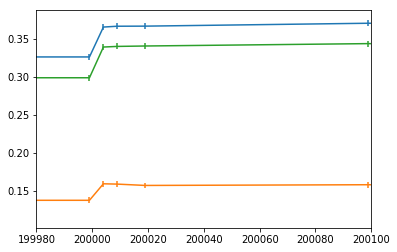

In [10]:
import matplotlib.pyplot as plt
plt.errorbar(timesteps, [score['rouge_1_f_score'] for score in scores], yerr=[score['rouge_1_f_score_ce']-score['rouge_1_f_score_cb'] for score in scores])
plt.errorbar(timesteps, [score['rouge_2_f_score'] for score in scores], yerr=[score['rouge_2_f_score_ce']-score['rouge_2_f_score_cb'] for score in scores])
plt.errorbar(timesteps, [score['rouge_l_f_score'] for score in scores], yerr=[score['rouge_l_f_score_ce']-score['rouge_l_f_score_cb'] for score in scores])
plt.xlim([199980, 200100])


In [41]:
timesteps, scores = plot_checkpoint_rouge(['checkpoints/LSTM1', 'checkpoints/LSTM2', 'checkpoints/LSTMCoverage2', 'checkpoints/Transformer1', 'checkpoints/Transformer2', 'checkpoints/TransformerCoverage3'])

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_rouge(rouge_type, rouge_key, file, ylim):
    without_coverage = (0, scores[1][rouge_key], 0, scores[4][rouge_key])
    without_coverage_std = [(0, scores[1][rouge_key]-scores[1][rouge_key+'_cb'], 0, scores[4][rouge_key]-scores[4][rouge_key+'_cb']),
                            #(0,0,0,0)]
                            (0, scores[1][rouge_key]-scores[1][rouge_key+'_cb'], 0, scores[4][rouge_key]-scores[4][rouge_key+'_cb'])]
    with_coverage = (scores[0][rouge_key], scores[2][rouge_key]-without_coverage[1], scores[3][rouge_key], scores[5][rouge_key]-without_coverage[3])
    with_coverage_std = [(scores[0][rouge_key]-scores[0][rouge_key+'_cb'], scores[2][rouge_key]-scores[2][rouge_key+'_cb'], scores[3][rouge_key]-scores[3][rouge_key+'_cb'], scores[5][rouge_key]-scores[5][rouge_key+'_cb']),
                         (scores[0][rouge_key]-scores[0][rouge_key+'_cb'], scores[2][rouge_key]-scores[2][rouge_key+'_cb'], scores[3][rouge_key]-scores[3][rouge_key+'_cb'], scores[5][rouge_key]-scores[5][rouge_key+'_cb'])]
    ind = np.arange(len(without_coverage))    # the x locations for the groups
    width = 0.40       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(10,10))
    p1 = plt.bar(ind, without_coverage, width, yerr=without_coverage_std)
    p2 = plt.bar(ind, with_coverage, width,
                 bottom=without_coverage, yerr=with_coverage_std)

    plt.ylabel(rouge_type+' Scores')
    plt.title(rouge_type+' Scores for model/training variants')
    plt.xticks(ind, ('LSTM w/o tricks', 'LSTM w/ tricks', 'Transformer w/o tricks', 'Transformer w/ tricks'))
    plt.legend((p1[0], p2[0]), ('without coverage', 'with coverage'))
    for i,patch in enumerate(p2):
        # get_width pulls left or right; get_y pushes up or down
        plt.text(patch.get_x(), p1[i].get_height()+patch.get_height()+.005, \
                str(round(without_coverage[i]+with_coverage[i], 4)), fontsize=12)

    plt.text(p1[1].get_x(), p1[1].get_height()+.005, \
            str(round(without_coverage[1], 4)), fontsize=12)
    plt.text(p1[3].get_x(), p1[3].get_height()+.005, \
            str(round(without_coverage[3], 4)), fontsize=12)
    plt.ylim(ylim)
    plt.savefig(file)

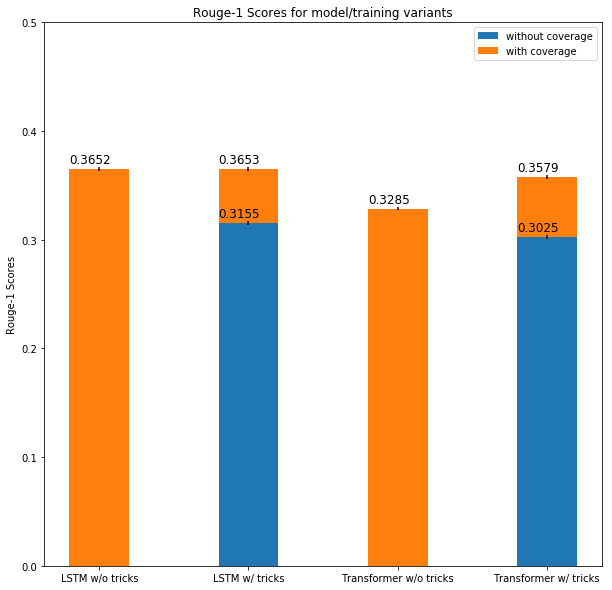

In [34]:
plot_rouge('Rouge-1', 'rouge_1_f_score', 'Rouge1.png', [0., .5])

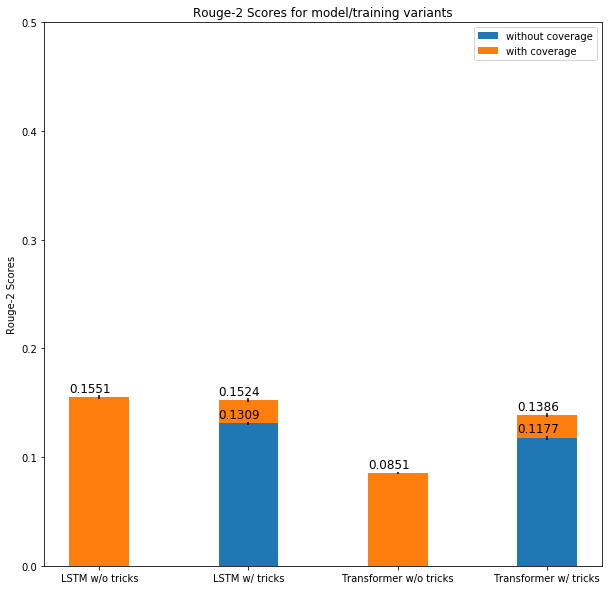

In [35]:
plot_rouge('Rouge-2', 'rouge_2_f_score', 'Rouge2.png', [0., .5])

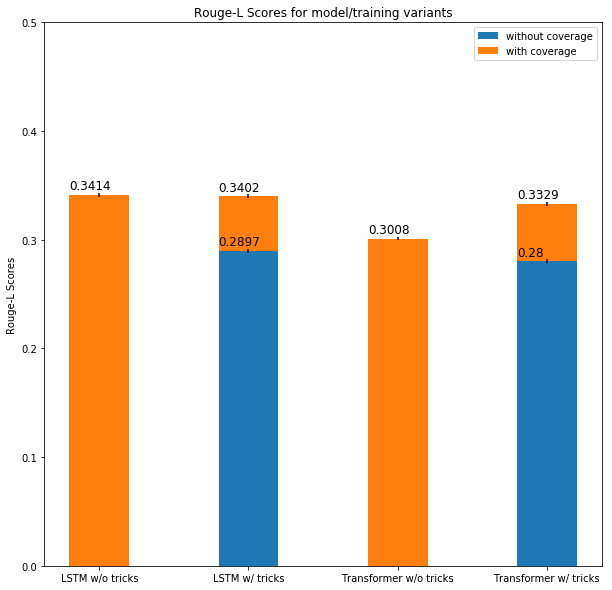

In [36]:
plot_rouge('Rouge-L', 'rouge_l_f_score', 'Rougel.png', [0., .5])